In [106]:
import IP
from IP import imread, imresize, randn, dtfuv, fftfilt, np, imshow, rgb2gray, plt, fft2, ifft2, fftshift
import scipy
from scipy.signal import convolve2d

In [107]:
# general function for adding blur and noise to our default image

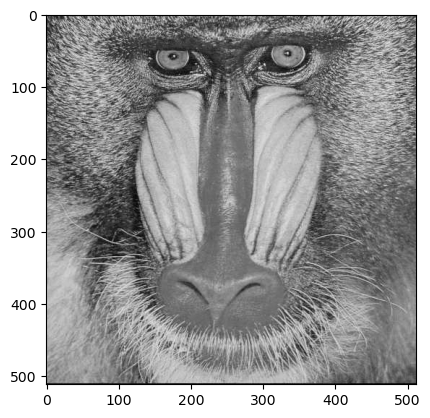

In [3]:
I = rgb2gray(imread("baboon.jpg"))
plt.figure()
imshow(I, aspect="equal", cmap="gray")

In [4]:
# # Gaussian lowpass filter
# def fftfiltGLPF(I, D0):
#     U,V=dtfuv(I.shape[0],I.shape[1])
#     D = IP.np.sqrt(U**2+V**2)
#     filter=IP.np.exp(-D**2/(2*(D0**2)))
#     return fftfilt(I,filter)

In [5]:
# Gaussian lowpass filter
def GLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
    If = fft2(I)
    filterf = fft2(filter)
    Ic = If * filterf
    return ifft2(Ic)

In [6]:
# # Uniform noise filter
# def uniform_noise(I, alpha=10):
#     noise = randn(I.shape[0], I.shape[1])
#     return noise*(I.mean()*(alpha/100))+I

In [89]:
# fixed? Uniform noise filter
def uniform_noise(I, alpha=10):
    noise = randn(I.shape[0], I.shape[1])
    return noise*((alpha/100))+I

In [104]:
noise = randn(I.shape[0], I.shape[1])
# ploting = plt.hist(noise.flatten(), bins=500)
print(np.std(noise))

1.0001240940781877


Text(0.5, 1.0, 'Gaussian blur w/ noise')

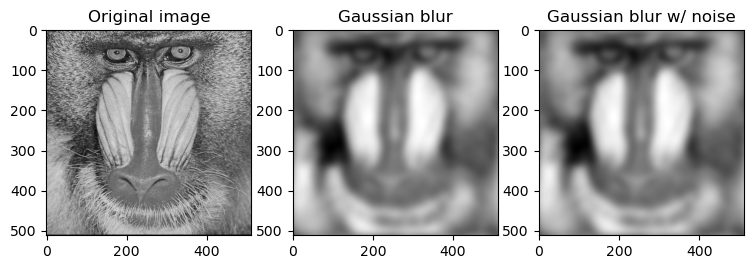

In [217]:
# Generate "broken" image
Ia = GLPF(I, 10)
# Iz = fftfiltGLPF(I, 40)
Ib = uniform_noise(Ia, 20)
plt.figure(figsize=(9,3))
IP.subplot(1,3,1);imshow(I, aspect="equal", cmap="gray"); plt.title('Original image')
IP.subplot(1,3,2);imshow(np.abs(Ia), aspect="equal", cmap="gray"); plt.title('Gaussian blur')
IP.subplot(1,3,3);imshow(np.abs(Ib), aspect="equal", cmap="gray"); plt.title('Gaussian blur w/ noise')

In [218]:
# Deblurring given known gaussian blur size 40

In [219]:
# "inverse" Gaussian lowpass filter
def iGLPF(I, D0):
    U,V=dtfuv(I.shape[0],I.shape[1])
    D = IP.np.sqrt(U**2+V**2)
    filter=IP.np.exp(-D**2/(2*(D0**2)))
#     padded = 2*I.shape[0]
#     filterpad = np.zeros([padded, padded],dtype = "complex_")
#     filterpad[:filter.shape[0],:filter.shape[1]] = filter
#     Ipad = np.zeros([padded, padded],dtype = "complex_")
#     Ipad[:I.shape[0],:I.shape[1]] = I
    If = fft2(I)
    filterf = fft2(filter)
    epsilon = 1e-10
    deblurred = If / (filterf+epsilon)
    return ifft2(deblurred)

#     If = fftfilt(I, filter)
#     If = If-If.min()
#     If =(If/If.max())*256
#     return If

In [220]:
# # adjusted iGLPF to take into account noisiness
# def iGLPF(I, D0):
#     U,V=dtfuv(I.shape[0],I.shape[1])
#     D = IP.np.sqrt(U**2+V**2)
#     filter=IP.np.exp(-D**2/(2*(D0**2)))
#     mask=1/(1+(D/D0)**(2))
#     If = fft2(I)
#     filterf = fft2(filter)
#     maskf = fft2(mask)
#     denoise = If * maskf
#     epsilon = 1e-10
#     deblurred = denoise / (filterf+epsilon)
#     return ifft2(deblurred)

Text(0.5, 1.0, 'Deblur of Gaussian w/ noise')

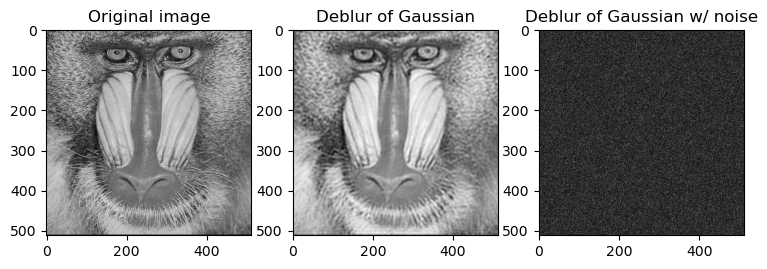

In [221]:
deblur_a = iGLPF(Ia, 10) # only blur
deblur_b = iGLPF(Ib, 10) # blur and random uniform noise
plt.figure(figsize=(9,3))
IP.subplot(1,3,1);imshow(np.abs(I), aspect="equal", cmap="gray"); plt.title('Original image')
IP.subplot(1,3,2);imshow(np.abs(deblur_a), aspect="equal", cmap="gray"); plt.title('Deblur of Gaussian')
IP.subplot(1,3,3);imshow(np.abs(deblur_b), aspect="equal", cmap="gray"); plt.title('Deblur of Gaussian w/ noise')

KeyboardInterrupt: 

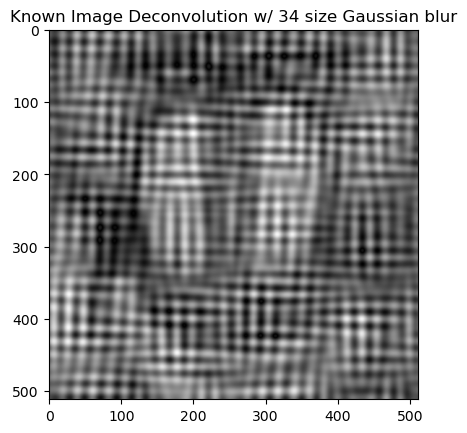

In [196]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    title = f'Known Image Deconvolution w/ {1+i} size Gaussian blur'
    plt.imshow(np.abs(Ibd), aspect="equal", cmap="gray")
    plt.title(title)
    filename = f'./test3/baboon_{1+i}.png'
    plt.savefig(filename)

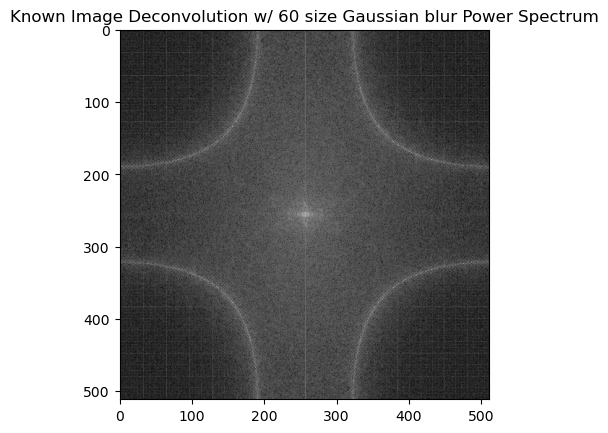

In [48]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    Ibdf = np.abs(fftshift(fft2(Ibd)))
    title = f'Known Image Deconvolution w/ {1+i} size Gaussian blur Power Spectrum'
    plt.imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray")
    plt.title(title)
    filename = f'./test3FT/baboonFT_{1+i}.png'
    plt.savefig(filename)

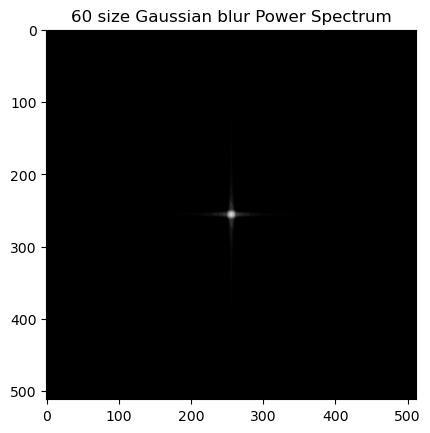

In [49]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    Ibdf = np.abs(fftshift(fft2(Ib)))
    title = f'{1+i} size Gaussian blur Power Spectrum'
    plt.imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray")
    plt.title(title)
    filename = f'./test3blurFT/baboonFT_{1+i}.png'
    plt.savefig(filename)

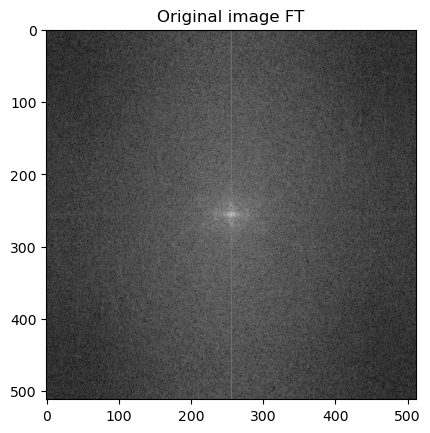

In [52]:
If = np.abs(fftshift(fft2(I)))
plt.imshow(np.log10(1+If), aspect="equal", cmap="gray")
plt.title("Original image FT")
filename = f'./baboonFT.png'
plt.savefig(filename)

In [56]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    Ibf = np.abs(fftshift(fft2(Ib)))
    Ibdf = np.abs(fftshift(fft2(Ibd)))
    title1 = f'{1+i} size Gaussian blur Power Spectrum'
    title2 = f'Known Image Deconvolution w/ {1+i} size Gaussian blur Power Spectrum'
    title3 = f'Known Image Deconvolution w/ {1+i} size Gaussian blur'
    plt.figure(figsize=(27,9))
    IP.subplot(1,3,1);imshow(np.log10(1+Ibf), aspect="equal", cmap="gray"); plt.title(title1)
    IP.subplot(1,3,2);imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray"); plt.title(title2)
    IP.subplot(1,3,3);imshow(np.abs(Ibd), aspect="equal", cmap="gray"); plt.title(title3)
    filename = f'./test4/baboon_{1+i}.png'
    plt.savefig(filename)
    plt.close()

Text(0.5, 1.0, 'Known Image Deconvolution w/ noise & 60 size Gaussian blur')

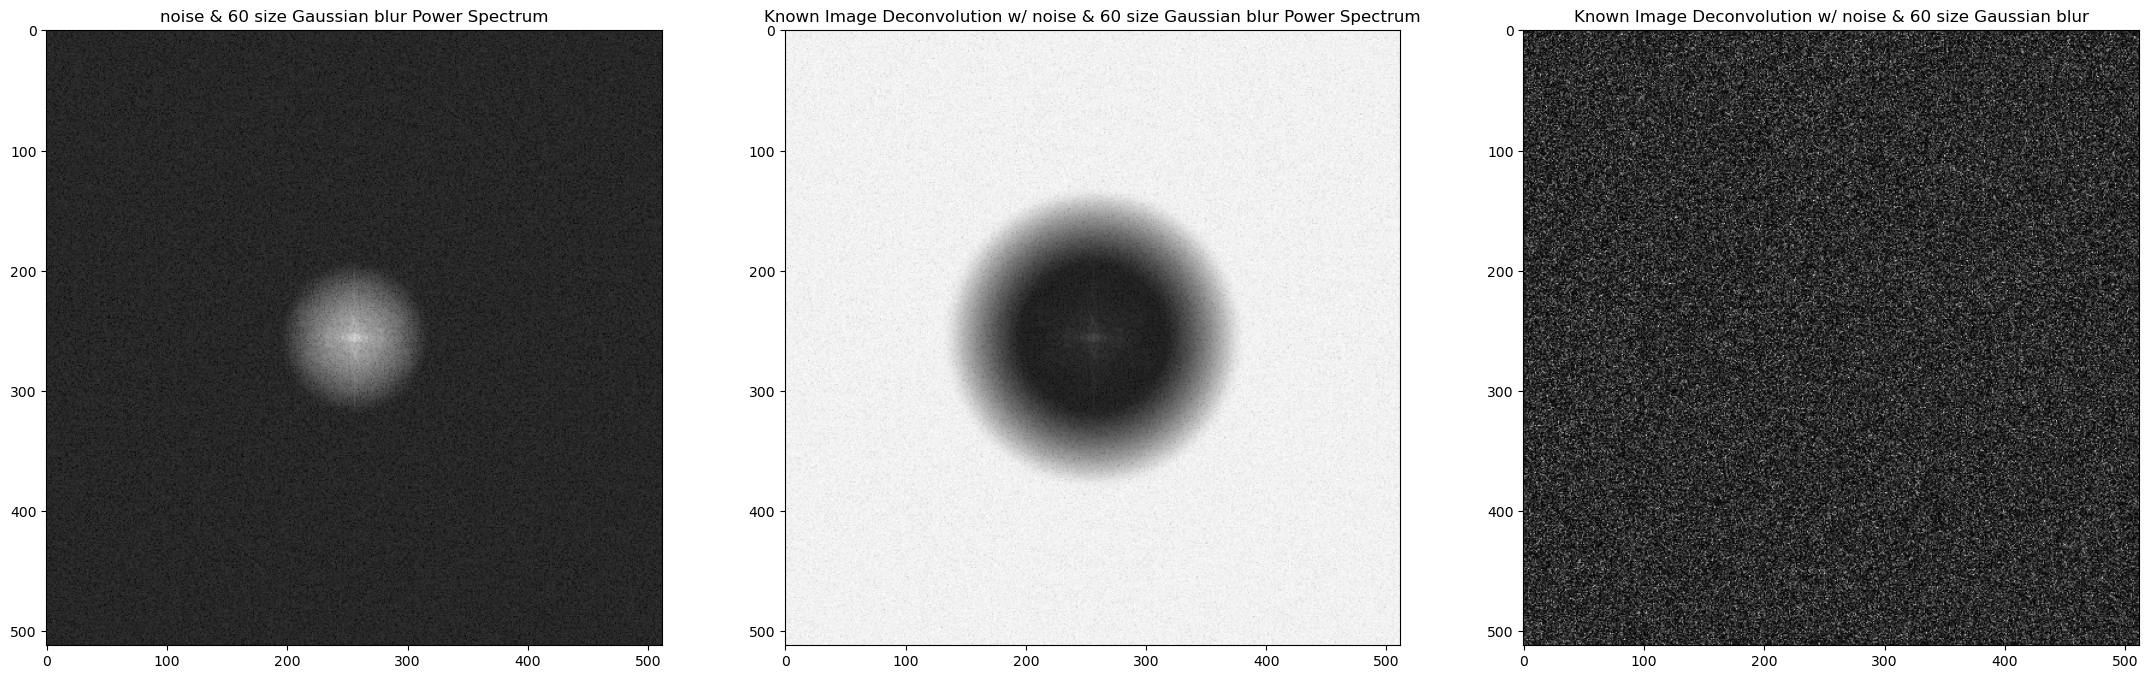

In [99]:
Ib = GLPF(I, 5)
Ibn = uniform_noise(Ib, 3.27)
Ibd = iGLPF(Ibn, 5)
Ibf = np.abs(fftshift(fft2(Ibn)))
Ibdf = np.abs(fftshift(fft2(Ibd)))
title1 = f'noise & {1+i} size Gaussian blur Power Spectrum'
title2 = f'Known Image Deconvolution w/ noise & {1+i} size Gaussian blur Power Spectrum'
title3 = f'Known Image Deconvolution w/ noise & {1+i} size Gaussian blur'
plt.figure(figsize=(27,9))
IP.subplot(1,3,1);imshow(np.log10(1+Ibf), aspect="equal", cmap="gray"); plt.title(title1)
IP.subplot(1,3,2);imshow(np.log10(1+Ibdf), aspect="equal", cmap="gray"); plt.title(title2)
IP.subplot(1,3,3);imshow(np.abs(Ibd), aspect="equal", cmap="gray"); plt.title(title3)
# filename = f'./test4/baboon_{1+i}.png'
# plt.savefig(filename)
# plt.close()

In [59]:
for i in range(60):
    Ib = GLPF(I, 1+i)
    Ibd = iGLPF(Ib, 1+i)
    title1 = f'{1+i} size Gaussian blur'
    title2 = f'Known Image Deconvolution w/ {1+i} size Gaussian blur'
    plt.figure(figsize=(10,5))
    IP.subplot(1,2,1);imshow(np.abs(Ib), aspect="equal", cmap="gray"); plt.title(title1)
    IP.subplot(1,2,2);imshow(np.abs(Ibd), aspect="equal", cmap="gray"); plt.title(title2)
    filename = f'./test5/baboon_{1+i}.png'
    plt.savefig(filename)
    plt.close()

In [60]:
# SNR based adding noise

1011.1875515440604


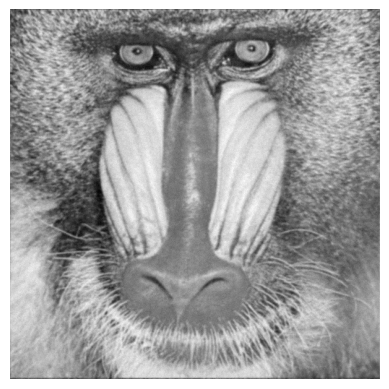

In [227]:
# # Uniform noise filter
# def uniform_noise(I, alpha=10):
#     noise = randn(I.shape[0], I.shape[1])
#     return noise*(I.mean()*(alpha/100))+I

#calculate current SNR
noise = randn(I.shape[0], I.shape[1])
alpha = 3.27 #for 30dB of noise, calculated by Ellen
Ib = np.abs(GLPF(I, 1))
In = noise*(Ib.mean()*(alpha/100))+Ib
SNR = np.sum((In)**2)/np.sum((noise*(Ib.mean()*(alpha/100)))**2)
print(SNR)
fig, ax = plt.subplots()
ax.imshow(In, aspect="equal", cmap="gray")
ax.axis('off')
plt.savefig("./blurred_noisy_baboon2.png", bbox_inches='tight', pad_inches=0)